<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-pima_indians_diabetes/blob/main/pima_indians_transcription_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###[부스트코스 - 프로젝트로 배우는 데이터 사이언스](https://www.boostcourse.org/ds214)

##주어진 데이터에서 결측치를 예측

###필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

In [2]:
import warnings
warnings.filterwarnings('ignore')

####시각화를 선명하게 해주기 위한 설정

In [3]:
plt.style.use('ggplot')
set_matplotlib_formats('svg')

###데이터 구성
- Pregnancies : 임신횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압(mm Hg)
- SkinThickness : 피부 주름 두께(mm)
- Insulin : 2시간 혈청 인슐린(mu U / ml)
- BMI : 체질량 지수(체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 당뇨가 아니다(0), 당뇨이다(1) 결과 값

###데이터셋 로드

In [175]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/Data/pima_indians_diabetes.csv")
df.shape

(768, 9)

In [176]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###학습, 예측 데이터셋 나누기

In [177]:
#label값을 기준으로 나누기
#나누기 전에 label 값을 시각화
(df['Insulin'] > 0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [178]:
#train 세트를 만들기
train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [179]:
#test 세트 만들기
test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

###EDA

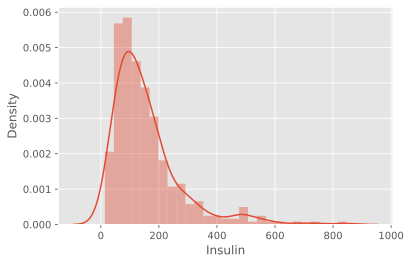

In [180]:
sns.distplot(train["Insulin"])

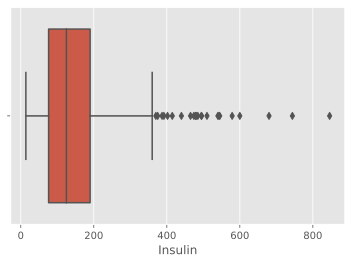

In [181]:
sns.boxplot(train["Insulin"])

In [182]:
#이상치 구하기
desc = train["Insulin"].describe()
# 3IQR - 1IQR = IQR
# 3IQR + (IQR * 1.5) < 이상치

IQR = desc['75%'] - desc["25%"]
Out = desc['75%'] + (IQR * 1.5)


In [183]:
train[train["Insulin"] > Out].shape

(24, 9)

In [184]:
print(train.shape)
train = train[train["Insulin"] < Out]
print(train.shape)

(394, 9)
(370, 9)


###학습, 예측에 사용할 컬럼

In [185]:
#feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져오기
feature_names = train.columns.tolist()
feature_names.remove('Insulin')
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

###정답값이자 예측해야할 값

In [186]:
#label_name 이라는 변수에 예측할 컬럼의 이름을 담기
label_name = "Insulin"
label_name

'Insulin'

###학습, 예측 데이터셋 만들기

In [187]:
#학습 세트 만들기 ex) 시험의 기출문제
X_train = train[feature_names]
X_train.shape

(370, 8)

In [188]:
#정답 값을 만들어주기 ex) 기출문제의 정답
y_train = train[label_name]
y_train.shape

(370,)

In [189]:
#예측에 사용할 데이터 세트를 만들기. ex) 실전 시험 문제
X_test = test[feature_names]
X_test.shape

(374, 8)

In [190]:
#예측의 정답값 ex) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(374,)

###머신러닝 알고리즘 가져오기

In [191]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
estimators = [DecisionTreeRegressor(random_state=42),
         RandomForestRegressor(random_state=42),
         GradientBoostingRegressor(random_state = 42)]
estimators

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
            

In [192]:
results = []
for estimator in estimators:
  result = []
  result.append(estimator.__class__.__name__)
  results.append(result)

In [193]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
  result = []
  max_depth = np.random.randint(5, 30,100)
  max_features = np.random.uniform(0.3, 1.0, 100)
  param_distributions = {"max_depth" : max_depth,
                        "max_features" : max_features}
  regressor = RandomizedSearchCV(estimator,
                          param_distributions,
                          n_iter= 10,
                          scoring=None,
                          n_jobs=-1,
                          cv=5,
                          verbose=2,
                          random_state = 42)

  regressor.fit(X_train, y_train)

  result.append(estimator.__class__.__name__)
  result.append(regressor.best_params_)
  result.append(regressor.best_estimator_)
  result.append(regressor.best_score_)
  result.append(regressor.cv_results_)
  results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.8s finished


In [194]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator","score","cv_result"]
best_estimator = df_cv.loc[1,"estimator"]
best_estimator

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=23, max_features=0.5029979802711517,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

###학습(훈련)

In [195]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=23, max_features=0.5029979802711517,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

###cross validation으로 학습 세트의 오차 측정하기


In [196]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(best_estimator, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_pred[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


array([ 50.12, 151.55,  94.36, 145.49, 181.26])

In [197]:
#정답을 정확하게 맞춘 갯수
(y_pred == y_train).sum()

0

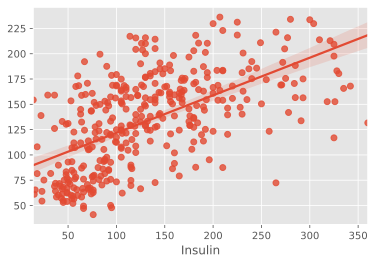

In [198]:
#regplot으로 결과 값을 표현
sns.regplot(y_train, y_pred)

In [199]:
#r2_score를 구하기
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.35050556486585915

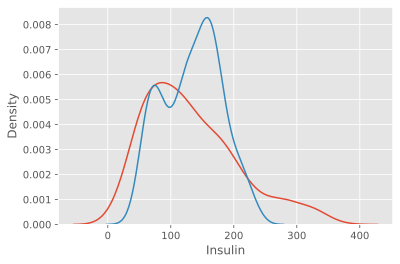

In [200]:
#distplot으로 정답값과 예측값의 분포를 그리기
sns.distplot(y_train, label='train', hist=False)
sns.distplot(y_pred, label='predict', hist=False)

###오차 구하기

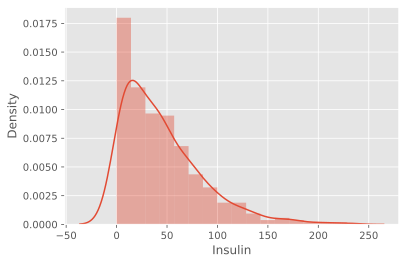

In [201]:
#MAE

error = abs(y_train - y_pred)
error.mean()
sns.distplot(error)

In [202]:
error.describe()

count    370.000000
mean      44.820595
std       39.620551
min        0.010000
25%       13.995000
50%       35.780000
75%       66.552500
max      228.330000
Name: Insulin, dtype: float64

In [203]:
#RMSE

np.sqrt(((y_train - y_pred) ** 2).mean())

59.786546222283086

###트리 알고리즘 분석하기

In [204]:
#피처의 중요도
best_estimator.feature_importances_

array([0.05341244, 0.38381281, 0.06712735, 0.10044272, 0.12865471,
       0.11288263, 0.10787564, 0.0457917 ])

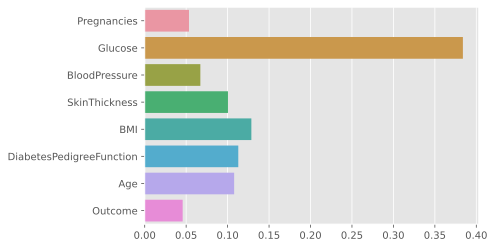

In [205]:
#피처의 중요도 시각화
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

###예측

In [206]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([176.45,  64.62, 186.68, 143.91, 169.57])

In [207]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [208]:
test["Insulin"] = y_test

In [209]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,132.278729,43.111216,49.91,95.9775,136.46,163.6625,225.13
1,138.0,173.962319,28.729761,99.89,155.1550,174.43,194.4125,245.43


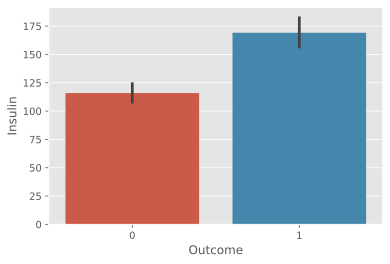

In [210]:
#Insulin 평균값을 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

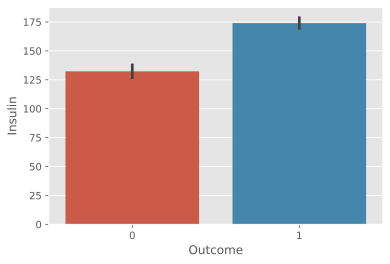

In [211]:
#예측값에 대하여 Insulin 평균값을 출력
sns.barplot(data=test, x="Outcome", y="Insulin")

###예측값을 csv 파일로 저장

In [213]:
df.loc[df["Insulin"] == 0, "Insulin"]

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [214]:
test["Insulin"]

0      176.45
1       64.62
2      186.68
5      143.91
7      169.57
        ...  
761    217.78
762     93.02
764    170.31
766    163.97
767     74.52
Name: Insulin, Length: 374, dtype: float64

In [215]:
df.loc[df["Insulin"] == 0, "Insulin"] = test["Insulin"]

In [219]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/diabetes_fill_insulin.csv", index=False)

In [220]:
pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/diabetes_fill_insulin.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,176.45,33.6,0.627,50,1
1,1,85,66,29,64.62,26.6,0.351,31,0
2,8,183,64,0,186.68,23.3,0.672,32,1
3,1,89,66,23,94.00,28.1,0.167,21,0
4,0,137,40,35,168.00,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.00,32.9,0.171,63,0
764,2,122,70,27,170.31,36.8,0.340,27,0
765,5,121,72,23,112.00,26.2,0.245,30,0
766,1,126,60,0,163.97,30.1,0.349,47,1
